## Importing Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="dark")

In [6]:
df = pd.read_csv("../processed_data/cars.csv")
df.head()

,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Classification
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Expensive
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Expensive
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Expensive
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Expensive
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Expensive


According to the EDA, our some columns have a strong correlation, positive or negative, with the target column. We will create a new dataframe with these columns and not going to use the Classification column because this is linear regression problem.

In [7]:
filtered_columns = df.corr()['price'][(df.corr()['price'] > 0.5) | (df.corr()['price'] < -0.5)].index
filtered_columns

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_12124\3318673514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_columns = df.corr()['price'][(df.corr()['price'] > 0.5) | (df.corr()['price'] < -0.5)].index


Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
final_df = df[filtered_columns]
final_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0


## Linear Regression

In [9]:
X = final_df.drop(columns="price").values
y = final_df.price.values

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score 

r2_score(y_test, y_pred) 

0.8059621215860795

Train RMSE: 3347.269498094972
Test RMSE: 3475.6339440301867


C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_12124\3359611242.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_12124\3359611242.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test -

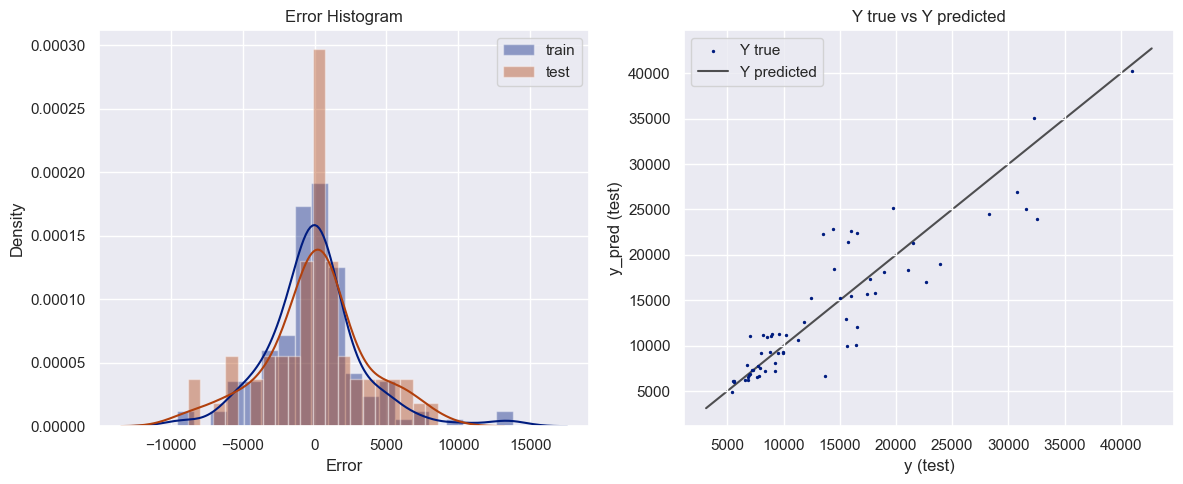

In [14]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Error Histogram')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Error')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y true vs Y predicted')
ax.scatter(y_test,y_test_pred, s =2, label = 'Y true')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicted')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.savefig("../visualizations/hist-errors-linear-cars.png")

plt.show()